In [3]:
!pip install wget

  Using cached wget-3.2-py3-none-any.whl


In [7]:
import os
import wget

file_name = "ChineseFont.ttf"
#TODO: 檢查是否已存在,避免重複下載
if not os.path.exists(file_name):
    wget.download('https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf', file_name)

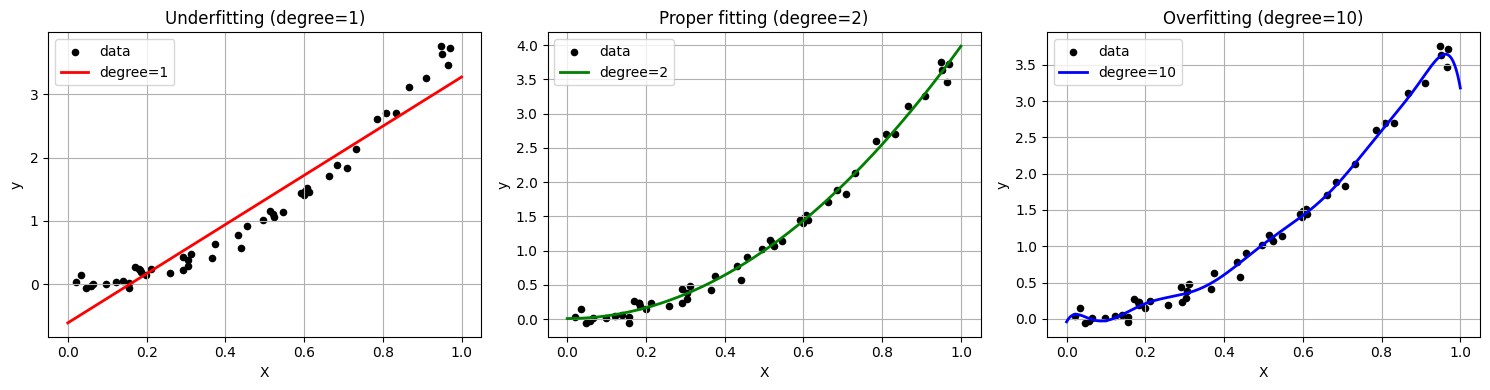

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#todo:
#生成模模擬數據
#生成50個點,範圍在0到1之間
#真實數據為二次函數加上噪聲
np.random.seed(42)  # 為了結果可重現
X = np.random.rand(50, 1)
y = 4 * (X ** 2) + np.random.randn(50, 1) * 0.1  # 二次函數加噪聲

# 擬合模型
# 欠擬合:用1次多項式擬合(直線)
coeffs_under = np.polyfit(X.flatten(), y.flatten(), 1)
poly_under = np.poly1d(coeffs_under)

# 適當擬合:用2次多項式擬合(二次曲線)
coeffs_proper = np.polyfit(X.flatten(), y.flatten(), 2)
poly_proper = np.poly1d(coeffs_proper)

# 過擬合:用10次多項式擬合
coeffs_over = np.polyfit(X.flatten(), y.flatten(), 10)
poly_over = np.poly1d(coeffs_over)

# 繪製3個子圖
# 3種擬合情況
# 使用scatter繪製原始數據點
# 繪製3個子圖
X_plot = np.linspace(0, 1, 500)
y_under_plot = poly_under(X_plot)
y_proper_plot = poly_proper(X_plot)
y_over_plot = poly_over(X_plot)

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# 欠擬合 (線性)
axs[0].scatter(X.flatten(), y.flatten(), color='black', s=20, label='data')
axs[0].plot(X_plot, y_under_plot, color='red', lw=2, label='degree=1')
axs[0].set_title('Underfitting (degree=1)')
axs[0].legend()
axs[0].grid(True)

# 適當擬合 (二次)
axs[1].scatter(X.flatten(), y.flatten(), color='black', s=20, label='data')
axs[1].plot(X_plot, y_proper_plot, color='green', lw=2, label='degree=2')
axs[1].set_title('Proper fitting (degree=2)')
axs[1].legend()
axs[1].grid(True)

# 過擬合 (高次)
axs[2].scatter(X.flatten(), y.flatten(), color='black', s=20, label='data')
axs[2].plot(X_plot, y_over_plot, color='blue', lw=2, label='degree=10')
axs[2].set_title('Overfitting (degree=10)')
axs[2].legend()
axs[2].grid(True)

for ax in axs:
    ax.set_xlabel('X')
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()
